# Table of Contents
 <p>

In [16]:
using LaTeXStrings
using GaussianProcesses
using Distributions
using Base.LinAlg
using Distances
import PyPlot; plt=PyPlot
plt.rc("figure", dpi=300.0)
# plt.rc("figure", figsize=(6,4))
plt.rc("figure", autolayout=true)
plt.rc("savefig", dpi=300.0)
plt.rc("text", usetex=true)
plt.rc("font", family="serif")
plt.rc("font", serif="Palatino")
;

In [1]:
X_LA = readcsv("Mississippi_data/X_LA.csv")
X_MS = readcsv("Mississippi_data/X_MS.csv")
LA_dist = readcsv("Mississippi_data/LA_Dist.csv")
MS_dist = readcsv("Mississippi_data/MS_Dist.csv")
sentinels = readcsv("Mississippi_data/sentinels.csv")
;

In [3]:
Y_MS = zeros(length(MS_dist))
Y_LA = zeros(length(LA_dist))
;

In [4]:
k = SEIso(log(5e4), 0.0)

Type: GaussianProcesses.SEIso, Params: [10.8198,0.0]


In [5]:
gp_MS = GP(X_MS, Y_MS, MeanZero(), k, 0.0)
gp_LA = GP(X_LA, Y_LA, MeanZero(), k, 0.0)
;

In [6]:
include("src/GeoRDD.jl")

GeoRDD

In [7]:
μ2d, Σ2d = GeoRDD.cliff_face(gp_MS, gp_LA, sentinels);
GeoRDD.inverse_variance(μ2d, Σ2d)

Distributions.Normal{Float64}(μ=0.0, σ=0.3124548161917129)

In [8]:
X_MS_1D = [MS_dist Y_MS]'
X_LA_1D = [LA_dist Y_LA]'

2×64 Array{Float64,2}:
 1.95313e5  1.95614e5  90133.1  8490.33  …  2.68197e5  72367.6  15455.3
 0.0        0.0            0.0     0.0      0.0            0.0      0.0

In [9]:
gp_MS_1d = GP(X_MS_1D, Y_MS, MeanZero(), k, 0.0)
gp_LA_1d = GP(-X_LA_1D, Y_LA, MeanZero(), k, 0.0)
;

In [10]:
√Σ1d.mat[1]

LoadError: UndefVarError: Σ1d not defined

In [11]:
μ1d, Σ1d = GeoRDD.cliff_face(gp_MS_1d, gp_LA_1d, zeros(2,1));
GeoRDD.inverse_variance(μ1d, Σ1d)

Distributions.Normal{Float64}(μ=0.0, σ=0.5776249539560109)

In [12]:
k = SEIso(log(5e5), 0.0)
gp_MS = GP(X_MS, Y_MS, MeanZero(), k, 0.0)
gp_LA = GP(X_LA, Y_LA, MeanZero(), k, 0.0)
μ2d, Σ2d = GeoRDD.cliff_face(gp_MS, gp_LA, sentinels);
println(GeoRDD.inverse_variance(μ2d, Σ2d))
gp_MS_1d = GP(X_MS_1D, Y_MS, MeanZero(), k, 0.0)
gp_LA_1d = GP(-X_LA_1D, Y_LA, MeanZero(), k, 0.0)
μ1d, Σ1d = GeoRDD.cliff_face(gp_MS_1d, gp_LA_1d, zeros(2,1));
print(GeoRDD.inverse_variance(μ1d, Σ1d))

Distributions.Normal{Float64}(μ=0.0, σ=0.2612288818345793)
Distributions.Normal{Float64}(μ=0.0, σ=0.26511865238741666)

In [13]:
logspace(-1,1,10)

10-element Array{Float64,1}:
  0.1     
  0.16681 
  0.278256
  0.464159
  0.774264
  1.29155 
  2.15443 
  3.59381 
  5.99484 
 10.0     

In [33]:
ℓs = logspace(3,6,30)
function vars(ℓ::Float64)
    k = SEIso(log(ℓ), 0.0)
    
    gp_MS = GP(X_MS, Y_MS, MeanZero(), k, 0.0)
    gp_LA = GP(X_LA, Y_LA, MeanZero(), k, 0.0)
    μ2d, Σ2d = GeoRDD.cliff_face(gp_MS, gp_LA, sentinels);
    σ2d = std(GeoRDD.inverse_variance(μ2d, Σ2d))

    gp_MS_1d = GP(X_MS_1D, Y_MS, MeanZero(), k, 0.0)
    gp_LA_1d = GP(-X_LA_1D, Y_LA, MeanZero(), k, 0.0)
    μ1d, Σ1d = GeoRDD.cliff_face(gp_MS_1d, gp_LA_1d, zeros(2,1));
    σ1d = std(GeoRDD.inverse_variance(μ1d, Σ1d))
    return σ1d,σ2d
end
σ_ℓ = [vars(ℓ) for ℓ in ℓs]

30-element Array{Tuple{Float64,Float64},1}:
 (1.41421,0.100711) 
 (1.41385,0.101814) 
 (1.41042,0.104345) 
 (1.39784,0.110518) 
 (1.37317,0.122435) 
 (1.34086,0.13948)  
 (1.30537,0.15963)  
 (1.25956,0.181291) 
 (1.19531,0.202755) 
 (1.1182,0.222268)  
 (1.04016,0.240593) 
 (0.968179,0.254458)
 (0.898125,0.264473)
 ⋮                  
 (0.495284,0.321319)
 (0.452756,0.323885)
 (0.415613,0.321004)
 (0.382432,0.315857)
 (0.352246,0.307424)
 (0.325279,0.2975)  
 (0.302039,0.286636)
 (0.282759,0.27443) 
 (0.2665,0.262313)  
 (0.251404,0.249991)
 (0.236403,0.23754) 
 (0.22165,0.225209) 

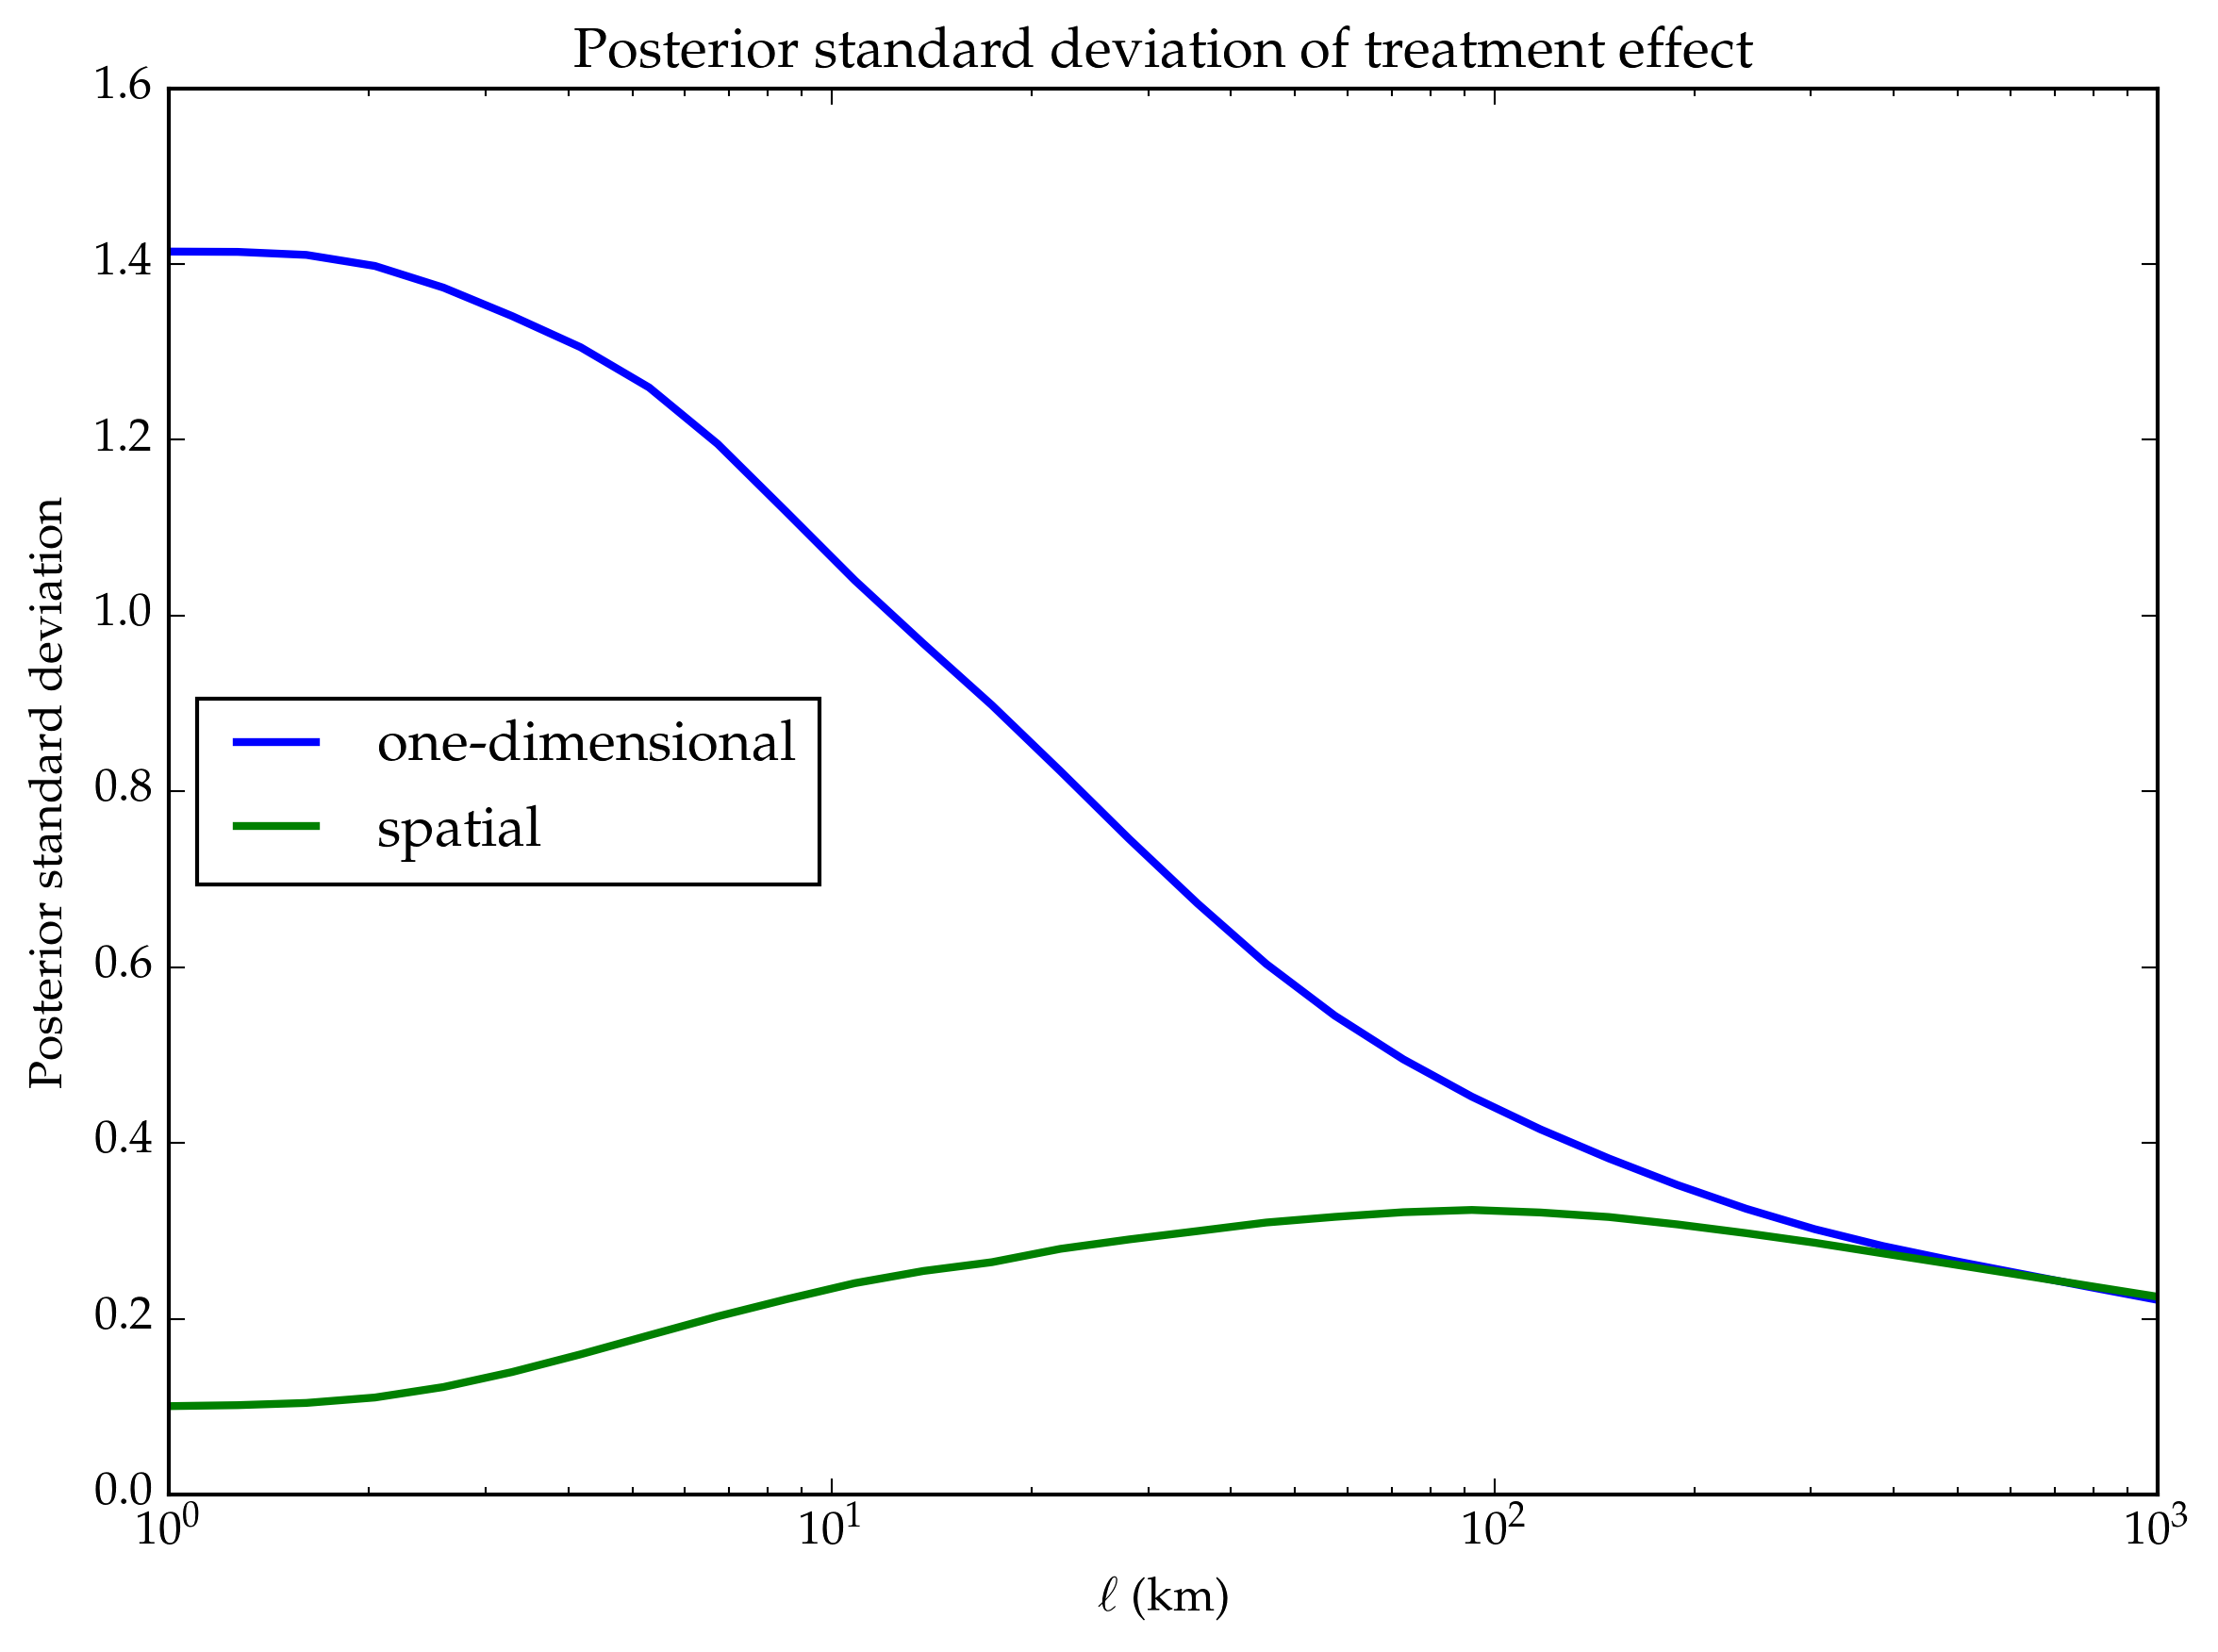

In [34]:
plt.semilogx(ℓs./1000, [t[1] for t in σ_ℓ], label="one-dimensional", linewidth=2)
plt.semilogx(ℓs./1000, [t[2] for t in σ_ℓ], label="spatial", linewidth=2)
plt.legend(loc="center left")
plt.xlabel(L"$\ell$ (km)")
plt.ylabel("Posterior standard deviation")
plt.title("Posterior standard deviation of treatment effect")
;